In [2]:
import pandas as pd
import imblearn
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [4]:
train = pd.read_csv('train_cleaned1.csv')
test = pd.read_csv('test_cleaned1.csv')

train.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1, inplace = True)
       #     'Molecular_Weight_molecule',
       # 'Topological_Polar_Surface_Area_molecule',
       # 'Number_of_Rotatable_Bonds_molecule',
       # 'Number_of_Hydrogen_Bond_Donors_molecule'], axis=1, inplace = True)
test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace = True)
       #     'Molecular_Weight_molecule',
       # 'Topological_Polar_Surface_Area_molecule',
       # 'Number_of_Rotatable_Bonds_molecule',
       # 'Number_of_Hydrogen_Bond_Donors_molecule'], axis=1, inplace = True)

In [5]:
train.head()

,id,Molecular_Weight_block1,Topological_Polar_Surface_Area_block1,Number_of_Rotatable_Bonds_block1,Number_of_Hydrogen_Bond_Donors_block1,Molecular_Weight_block2,Topological_Polar_Surface_Area_block2,Number_of_Rotatable_Bonds_block2,Number_of_Hydrogen_Bond_Donors_block2,Molecular_Weight_block3,Topological_Polar_Surface_Area_block3,Number_of_Rotatable_Bonds_block3,Number_of_Hydrogen_Bond_Donors_block3,Molecular_Weight_molecule,Topological_Polar_Surface_Area_molecule,Number_of_Rotatable_Bonds_molecule,Number_of_Hydrogen_Bond_Donors_molecule,binds,protein_name
0,47891720,452.304,75.63,2.0,3.0,163.995,51.80,1.0,3.0,290.797,63.40,1.0,5.0,883.930,167.02,4.0,13.0,0,-1
1,229779481,439.265,88.52,2.0,4.0,259.265,92.50,2.0,4.0,219.248,78.85,1.0,6.0,931.073,236.06,5.0,16.0,0,0
2,257335782,421.880,75.63,2.0,3.0,168.624,64.35,2.0,3.0,163.220,35.25,1.0,2.0,730.558,151.42,5.0,10.0,0,1
3,238693097,379.456,75.63,2.0,3.0,220.320,45.39,1.0,4.0,212.684,56.73,1.0,4.0,789.294,153.94,4.0,13.0,0,-1
4,37593660,403.434,84.86,2.0,4.0,155.600,35.25,1.0,2.0,185.654,35.25,1.0,2.0,721.522,131.55,4.0,10.0,0,1


In [10]:
y = train[['binds']]
train.drop(['binds'], axis=1, inplace=True)

In [4]:
train.columns

Index(['id', 'Molecular_Weight_block1',
       'Topological_Polar_Surface_Area_block1',
       'Number_of_Rotatable_Bonds_block1',
       'Number_of_Hydrogen_Bond_Donors_block1', 'Molecular_Weight_block2',
       'Topological_Polar_Surface_Area_block2',
       'Number_of_Rotatable_Bonds_block2',
       'Number_of_Hydrogen_Bond_Donors_block2', 'Molecular_Weight_block3',
       'Topological_Polar_Surface_Area_block3',
       'Number_of_Rotatable_Bonds_block3',
       'Number_of_Hydrogen_Bond_Donors_block3', 'protein_name'],
      dtype='object')

In [17]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

rs =123
def grid_search_xgb(X_train, y_train):
    # Define the parameter grid for XGBoost
    params_grid = {
        'max_depth': [5, 10, 15, 20],
        'n_estimators': [25, 50, 100],
        'scale_pos_weight': [0.1, 0.5, 2, 10]
    }

    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Scale X_train, X_test, and test
    X_train_scaled = scaler.fit_transform(X_train.drop('id', axis=1))
    X_test_scaled = scaler.transform(x_test.drop('id', axis=1))
    test_scaled = scaler.transform(test.drop('id', axis=1))

    # Initialize the XGBClassifier model
    xgb_model = XGBClassifier(random_state=rs)

    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='f1', cv=2, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    # Predict on the scaled test set
    preds = grid_search.predict(X_test_scaled)
    probs = grid_search.predict_proba(X_test_scaled)[:, 1]
    submit = grid_search.predict_proba(test_scaled)[:, 1]

    # Create submission DataFrame and save to CSV
    submit_df = pd.DataFrame({'id': test['id'], 'binds': submit})
    submit_df.to_csv('submit_3__xg.csv', index=False)

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print('Confusion Matrix - XGBoost:\n', cm)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='XGBoost')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - XGBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Feature importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.drop('id', axis=1).columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances)
    plt.title('Feature Importances - XGBoost')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.show()

    # Classification metrics report
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print('Metrics - XGBoost:')
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)

In [8]:
def split_data(df, target):
    return train_test_split(df, target, test_size=0.3, stratify=y, random_state = 123)

In [11]:
# Split the training and testing dataset
x_train, x_test, y_train, y_test = split_data(train, y)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
Confusion Matrix - XGBoost:
 [[1170140   29860]
 [  29051   90949]]


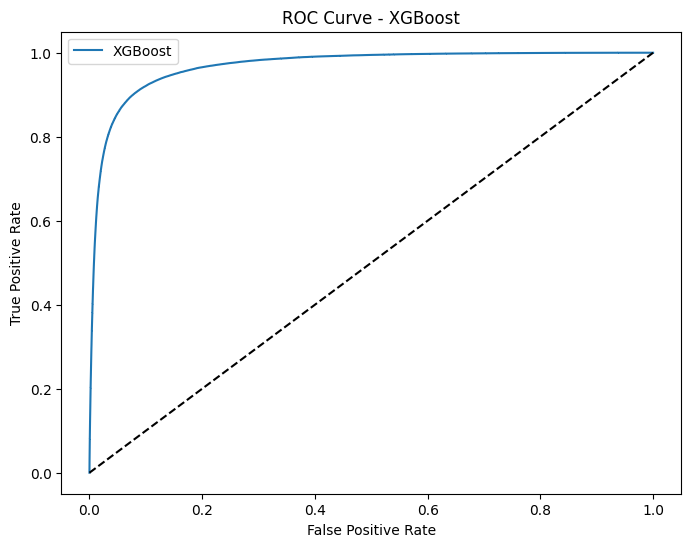

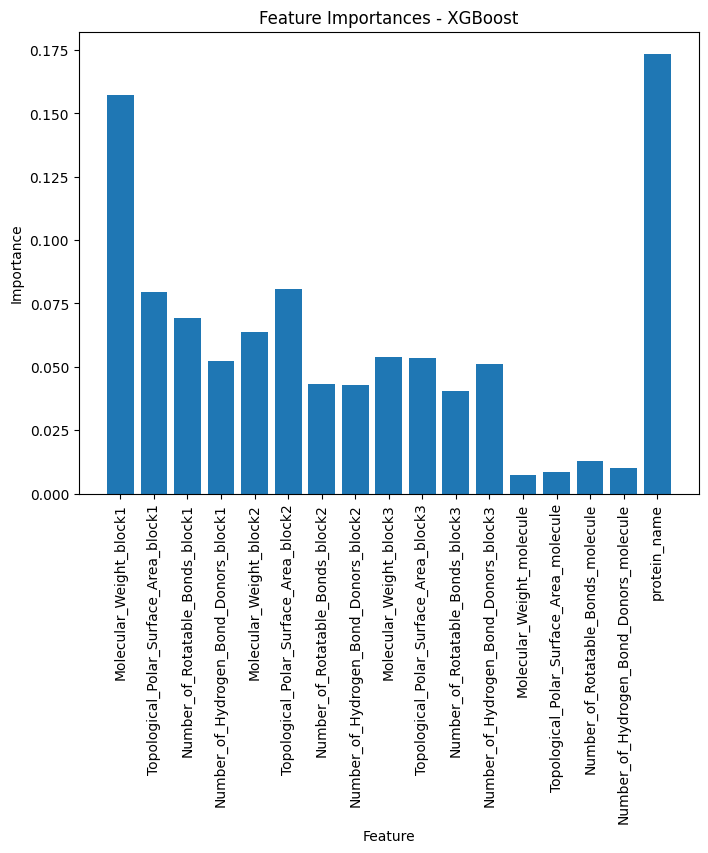

Metrics - XGBoost:
F1 Score: 0.7553621334750777
Recall: 0.7579083333333333
Precision: 0.7528329842975275
Accuracy: 0.9553704545454546


In [18]:
grid_search_xgb(x_train, y_train)

In [17]:
pd.read_csv('submit_3__xg.csv').shape

(1674896, 2)